In [2]:
# It's dangerous to go alone, take these
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode, wilcoxon, ranksums, spearmanr, pearsonr
from sklearn.metrics import f1_score, confusion_matrix, classification_report 
from os import listdir
%matplotlib inline

clustlist = ['gsea', 'gsva','ora','metaneighbor','adobo','sccatch','cibersort']
celllist =  ['LAmbDA',
             'Cell_BLAST', # this leaves the first and last character of the predictions off, can't use it.
             'RF',
             'kNN9',
             'ACTINN',
             'LDA',
             'LDArej',
             'CaSTLe',
             'scmapcluster',
             'SVM',
             'SingleCellNet',
             'scVI',
             'SVMrej',
             'scmapcell',
             'NMC',
             'singleR',
             'scID',
             'scPred',
             'CHETAH',
            ]

dataset_rename = {'cb':'Chung',
                  'dg': 'Darmanis',
                  'jam': 'Jerby Arnon',
                  'li_crc': 'Li',
                  'llc': 'Lambrechts',
                  'peng': 'Peng',
                  'tm':'Tirosh',
                  'vg':'Van Galen',
                 }

In [3]:
#TODO copy code from the python console you've got open.
fulldf = pd.read_csv("/Users/erik/Documents/school/thesis/results/performance/seurat/llc_classification_report.tsv", sep='\t')
fulldf = fulldf[fulldf['method'].isin(celllist)]
#fulldf = fulldf[fulldf['support']>=500]
fulldf['cellprop']=fulldf['support']/51775
#drop unnecessary rows and sort rows from fewest to most cells
fulldf = fulldf[fulldf['class']!='macro avg']
fulldf = fulldf[fulldf['class']!='weighted avg']
fulldf = fulldf[fulldf['class']!='UNLABELED']
#fulldf = fulldf[fulldf['class'].isin(celltypes)]
fulldf = fulldf.sort_values('support',axis=0)
fulldf['dataset'] = 'original'
#make a dictionary we can use to sort the other dataframe
sortdict = pd.Series(fulldf['support'].values,index=fulldf['class']).to_dict()
print(fulldf[fulldf['method']=='SVM'][['support','class']])
fulldf.drop(columns=['precision','recall','specificity'],inplace=True)
    
display(fulldf.head())

     support                 class
142      8.0         ERYTHROBLASTS
136     68.0           BASAL_CELLS
146     85.0          LYMPHATIC_EC
150    135.0  SECRETORY_CLUB_CELLS
141    381.0      EPITHELIAL_CELLS
144    477.0          GRANULOCYTES
139    586.0       DENDRITIC_CELLS
148    613.0            MAST_CELLS
145    714.0      LANGERHANS_CELLS
135   1335.0         ALVEOLAR_CELL
143   1460.0           FIBROBLASTS
140   1507.0      ENDOTHELIAL_CELL
149   1741.0  NATURAL_KILLER_CELLS
137   4065.0               B_CELLS
138   7424.0          CANCER_CELLS
147   8027.0           MACROPHAGES
151  23149.0               T_CELLS


,method,class,f1_score,support,cellprop,dataset
315,Cell_BLAST,ERYTHROBLASTS,0.000000,8.0,0.000155,original
181,RF,ERYTHROBLASTS,0.000000,8.0,0.000155,original
472,scmapcluster,ERYTHROBLASTS,0.355556,8.0,0.000155,original
412,CHETAH,ERYTHROBLASTS,0.003150,8.0,0.000155,original
335,SingleCellNet,ERYTHROBLASTS,0.000000,8.0,0.000155,original


In [4]:
filtered_df = pd.read_csv('/Users/erik/Documents/school/thesis/results/plots/seurat/test/subsampling/performance/Lambrechts_LC_800.tsv',sep='\t')
filtered_df.drop(columns=['precision','recall','specificity','sorting','support','cellprop'],inplace=True)
filtered_df.head()

,method,class,f1_score,dataset
0,NMC,EPITHELIAL_CELLS,0.826364,balanced
1,SingleCellNet,EPITHELIAL_CELLS,0.973538,balanced
2,scmapcluster,EPITHELIAL_CELLS,0.881653,balanced
3,scVI,EPITHELIAL_CELLS,0.979642,balanced
4,CaSTLe,EPITHELIAL_CELLS,0.967662,balanced


In [5]:
all_df = pd.read_csv('./performance/Lambrechts_LC_800.tsv',sep='\t')
all_df.drop(columns=['precision','recall','specificity','sorting','support','cellprop'],inplace=True)
all_df.head()

,method,class,f1_score,dataset
0,SVM,ERYTHROBLASTS,0.998752,balanced
1,RF,ERYTHROBLASTS,0.998752,balanced
2,scPred,ERYTHROBLASTS,0.934297,balanced
3,NMC,ERYTHROBLASTS,0.711427,balanced
4,SingleCellNet,ERYTHROBLASTS,0.995025,balanced


In [6]:
filtered_df = filtered_df.merge(fulldf,on=['method','class'])
filtered_df['delta_f1'] = filtered_df['f1_score_x'] - filtered_df['f1_score_y']
filtered_df

,method,class,f1_score_x,dataset_x,f1_score_y,support,cellprop,dataset_y,delta_f1
0,NMC,EPITHELIAL_CELLS,0.826364,balanced,0.786982,381.0,0.007359,original,0.039382
1,SingleCellNet,EPITHELIAL_CELLS,0.973538,balanced,0.843338,381.0,0.007359,original,0.130200
2,scmapcluster,EPITHELIAL_CELLS,0.881653,balanced,0.644377,381.0,0.007359,original,0.237276
3,scVI,EPITHELIAL_CELLS,0.979642,balanced,0.566787,381.0,0.007359,original,0.412855
4,CaSTLe,EPITHELIAL_CELLS,0.967662,balanced,0.831169,381.0,0.007359,original,0.136493
...,...,...,...,...,...,...,...,...,...
242,CaSTLe,T_CELLS,0.918788,balanced,0.985373,23149.0,0.447108,original,-0.066585
243,scmapcluster,T_CELLS,0.853846,balanced,0.840704,23149.0,0.447108,original,0.013142
244,NMC,T_CELLS,0.582852,balanced,0.841542,23149.0,0.447108,original,-0.258690
245,Cell_BLAST,T_CELLS,0.490980,balanced,0.978601,23149.0,0.447108,original,-0.487620


In [7]:
all_df = all_df.merge(fulldf,on=['method','class'])
all_df['delta_f1'] = all_df['f1_score_x'] - all_df['f1_score_y']
all_df

,method,class,f1_score_x,dataset_x,f1_score_y,support,cellprop,dataset_y,delta_f1
0,SVM,ERYTHROBLASTS,0.998752,balanced,0.545455,8.0,0.000155,original,0.453297
1,RF,ERYTHROBLASTS,0.998752,balanced,0.000000,8.0,0.000155,original,0.998752
2,scPred,ERYTHROBLASTS,0.934297,balanced,0.000000,8.0,0.000155,original,0.934297
3,NMC,ERYTHROBLASTS,0.711427,balanced,0.007293,8.0,0.000155,original,0.704135
4,SingleCellNet,ERYTHROBLASTS,0.995025,balanced,0.000000,8.0,0.000155,original,0.995025
...,...,...,...,...,...,...,...,...,...
318,RF,T_CELLS,0.928398,balanced,0.974658,23149.0,0.447108,original,-0.046260
319,SingleCellNet,T_CELLS,0.922062,balanced,0.983339,23149.0,0.447108,original,-0.061276
320,Cell_BLAST,T_CELLS,0.576779,balanced,0.978601,23149.0,0.447108,original,-0.401822
321,ACTINN,T_CELLS,0.938825,balanced,0.989618,23149.0,0.447108,original,-0.050793


,method,class,support,cellprop,filtered_delta_f1,unfiltered_delta_f1
0,NMC,EPITHELIAL_CELLS,381.0,0.007359,0.039382,0.037819
1,SingleCellNet,EPITHELIAL_CELLS,381.0,0.007359,0.130200,0.126471
2,scmapcluster,EPITHELIAL_CELLS,381.0,0.007359,0.237276,0.203843
3,scVI,EPITHELIAL_CELLS,381.0,0.007359,0.412855,0.409094
4,CaSTLe,EPITHELIAL_CELLS,381.0,0.007359,0.136493,0.124806


0.8717210267192144
7.320914823920738e-78


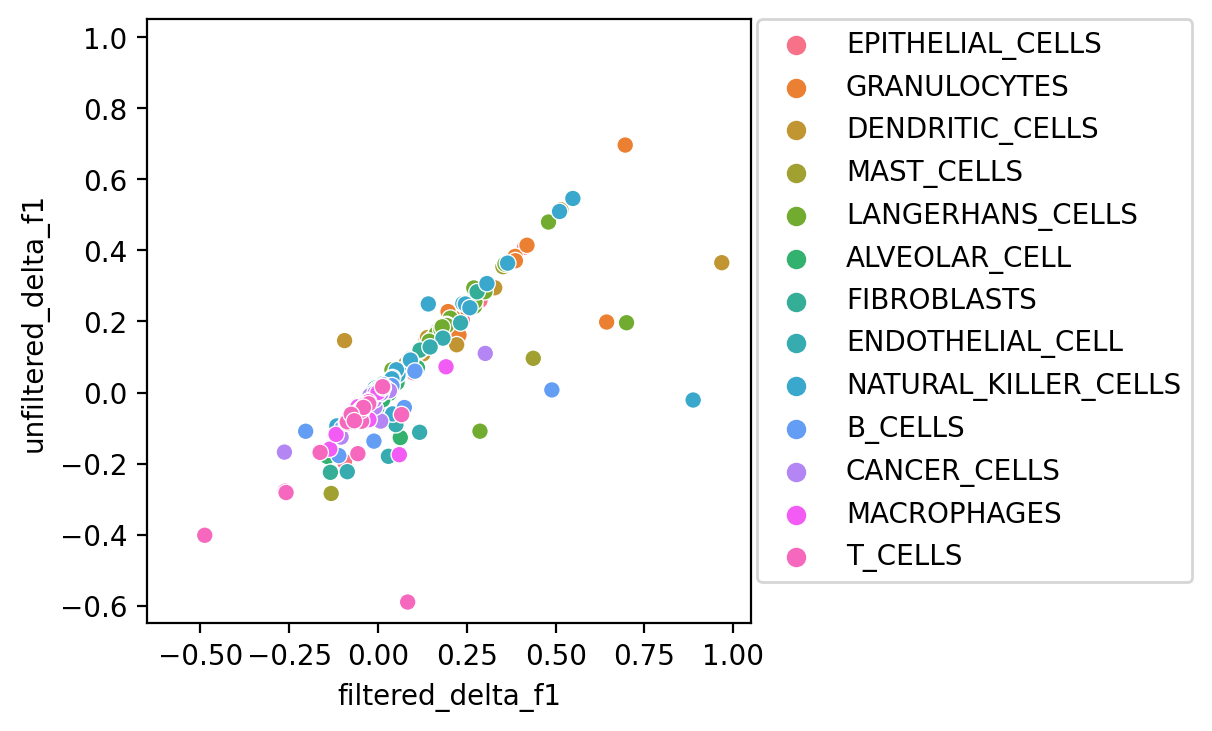

In [8]:
plotdf1 = filtered_df.drop(columns=['f1_score_x','dataset_x','f1_score_y','dataset_y'])
plotdf1 = plotdf1.rename(columns={'delta_f1':'filtered_delta_f1'})
plotdf1 = plotdf1.merge(all_df.drop(columns=['f1_score_x','dataset_x','f1_score_y','dataset_y',
                                             'support','cellprop']),
                        on = ['method','class']
                       )
plotdf1 = plotdf1.rename(columns={'delta_f1':'unfiltered_delta_f1'})
display(plotdf1.head())
fig,ax = plt.subplots(1,1,dpi=200)
sctplt = sns.scatterplot(data=plotdf1,x='filtered_delta_f1',y='unfiltered_delta_f1',hue='class',ax=ax)
sctplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
sctplt.set_ylim(-0.65,1.05)
sctplt.set_xlim(-0.65,1.05)
sctplt.set_aspect(1)

rho, p = spearmanr(plotdf1['filtered_delta_f1'],plotdf1['unfiltered_delta_f1'])
print(rho)
print(p)

-0.6548581716781537
1.2341163912196634e-31


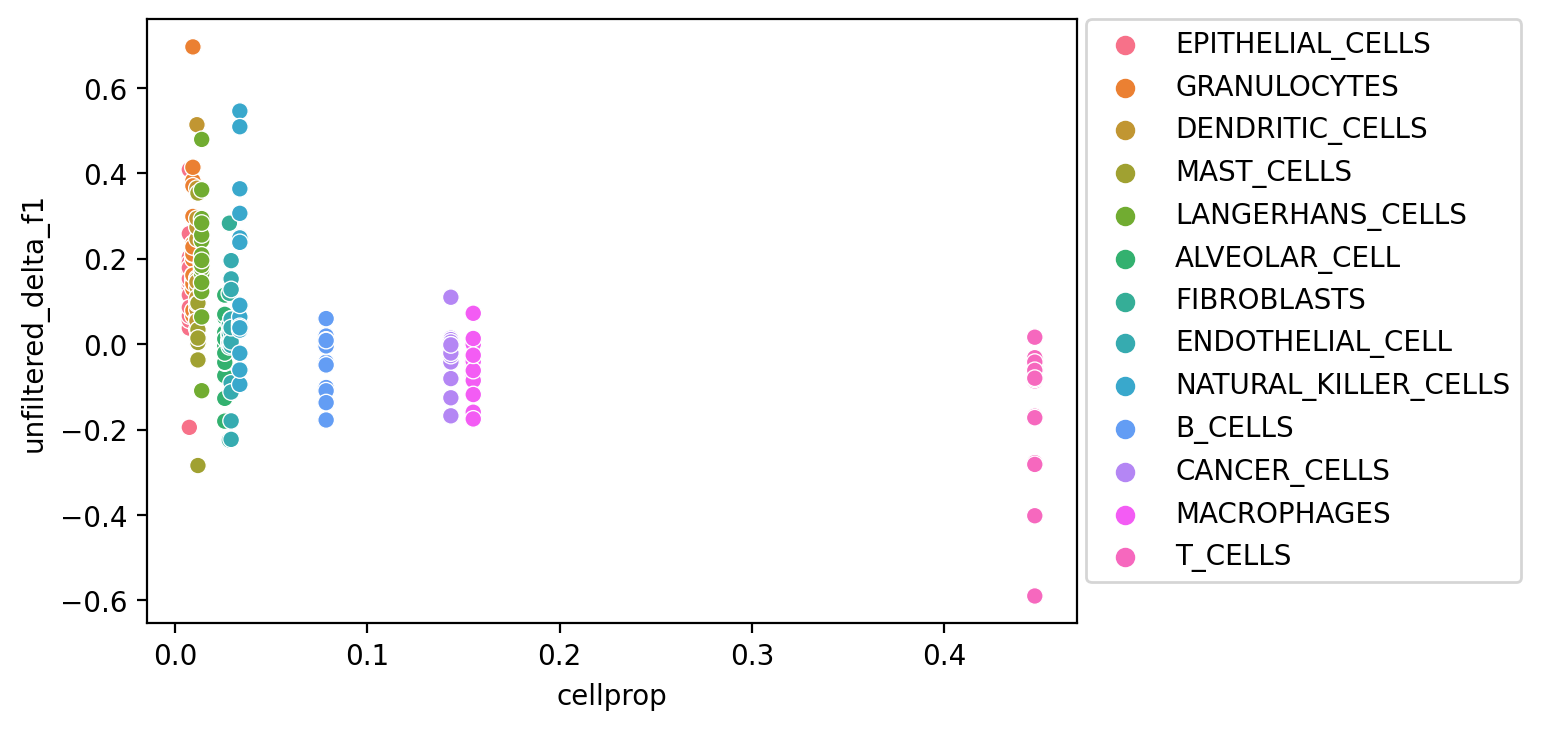

In [9]:
fig,ax = plt.subplots(1,1,dpi=200)
sctplt = sns.scatterplot(data=plotdf1,x='cellprop',y='unfiltered_delta_f1',hue='class',ax=ax)
sctplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#sctplt.set_ylim(-0.65,1.05)
#sctplt.set_xlim(-0.65,1.05)
#sctplt.set_aspect(1)
rho, p = spearmanr(plotdf1['cellprop'],plotdf1['unfiltered_delta_f1'])
print(rho)
print(p)

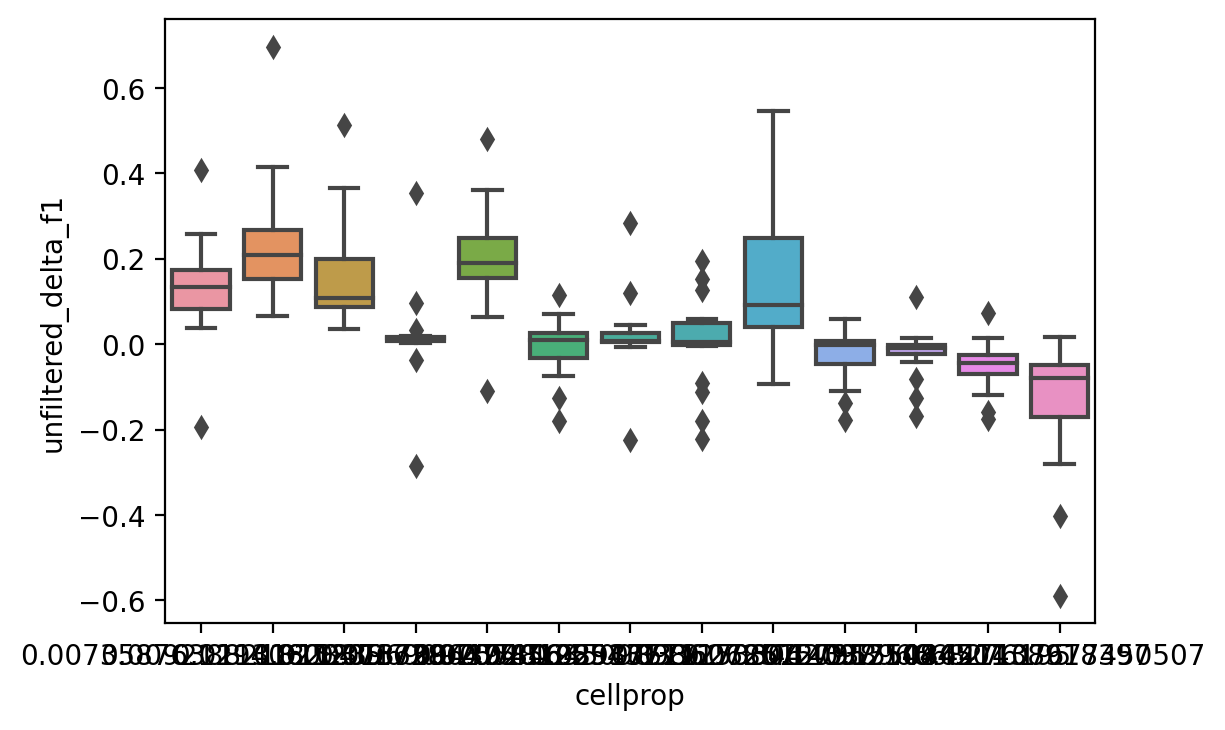

In [10]:
fig,ax = plt.subplots(1,1,dpi=200)
sctplt = sns.boxplot(data=plotdf1,x='cellprop',y='unfiltered_delta_f1',ax=ax)
#sctplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#sctplt.set_ylim(-0.65,1.05)
#sctplt.set_xlim(-0.65,1.05)
#sctplt.set_aspect(1)

-0.6548581716781537
1.2341163912196634e-31


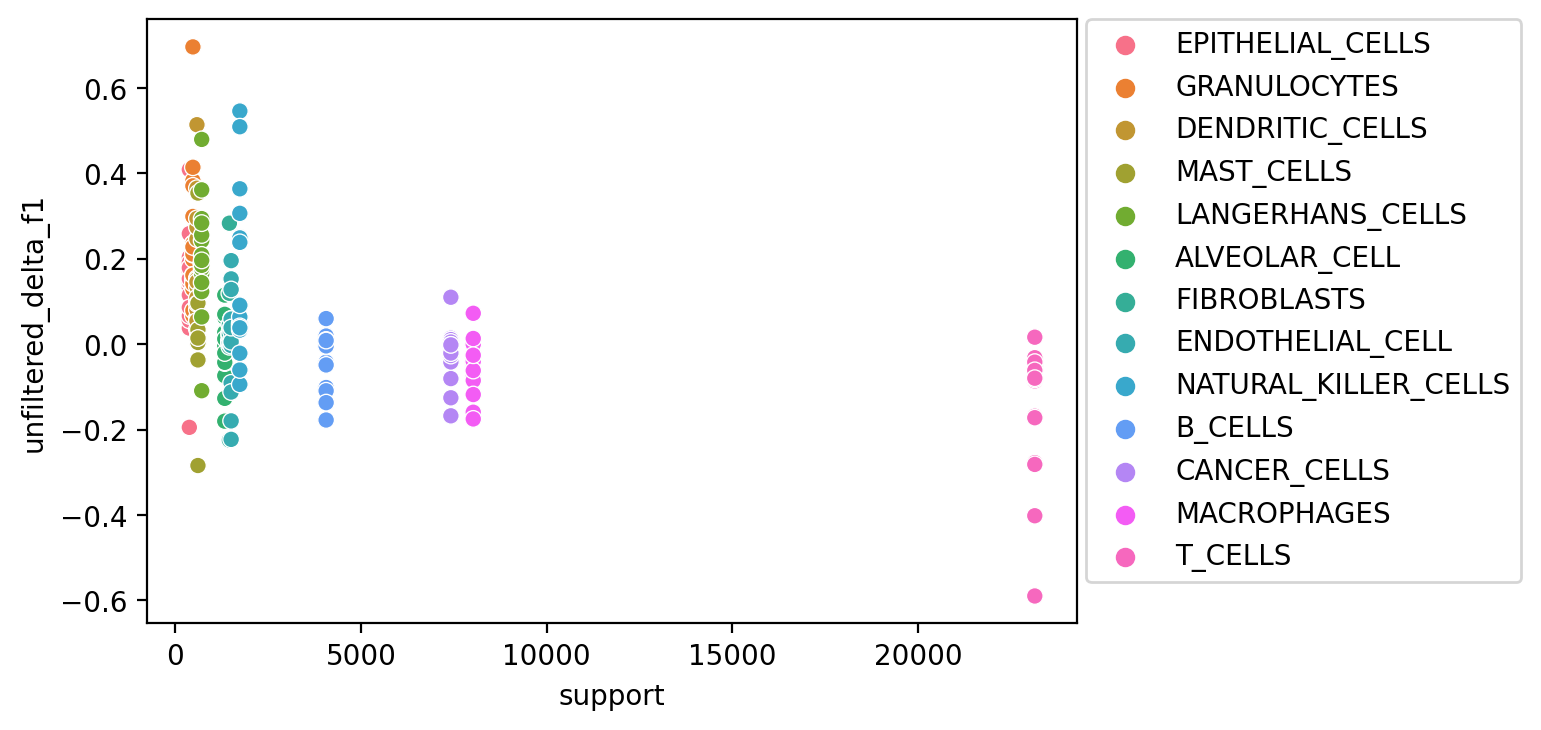

In [11]:
fig,ax = plt.subplots(1,1,dpi=200)
sctplt = sns.scatterplot(data=plotdf1,x='support',y='unfiltered_delta_f1',hue='class',ax=ax)
sctplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#sctplt.set_ylim(-0.65,1.05)
#sctplt.set_xlim(-0.65,1.05)
#sctplt.set_aspect(1)
rho, p = spearmanr(plotdf1['support'],plotdf1['unfiltered_delta_f1'])
print(rho)
print(p)

[Text(0, 0, 'EPITHELIAL_CELLS'),
 Text(1, 0, 'GRANULOCYTES'),
 Text(2, 0, 'DENDRITIC_CELLS'),
 Text(3, 0, 'MAST_CELLS'),
 Text(4, 0, 'LANGERHANS_CELLS'),
 Text(5, 0, 'ALVEOLAR_CELL'),
 Text(6, 0, 'FIBROBLASTS'),
 Text(7, 0, 'ENDOTHELIAL_CELL'),
 Text(8, 0, 'NATURAL_KILLER_CELLS'),
 Text(9, 0, 'B_CELLS'),
 Text(10, 0, 'CANCER_CELLS'),
 Text(11, 0, 'MACROPHAGES'),
 Text(12, 0, 'T_CELLS')]

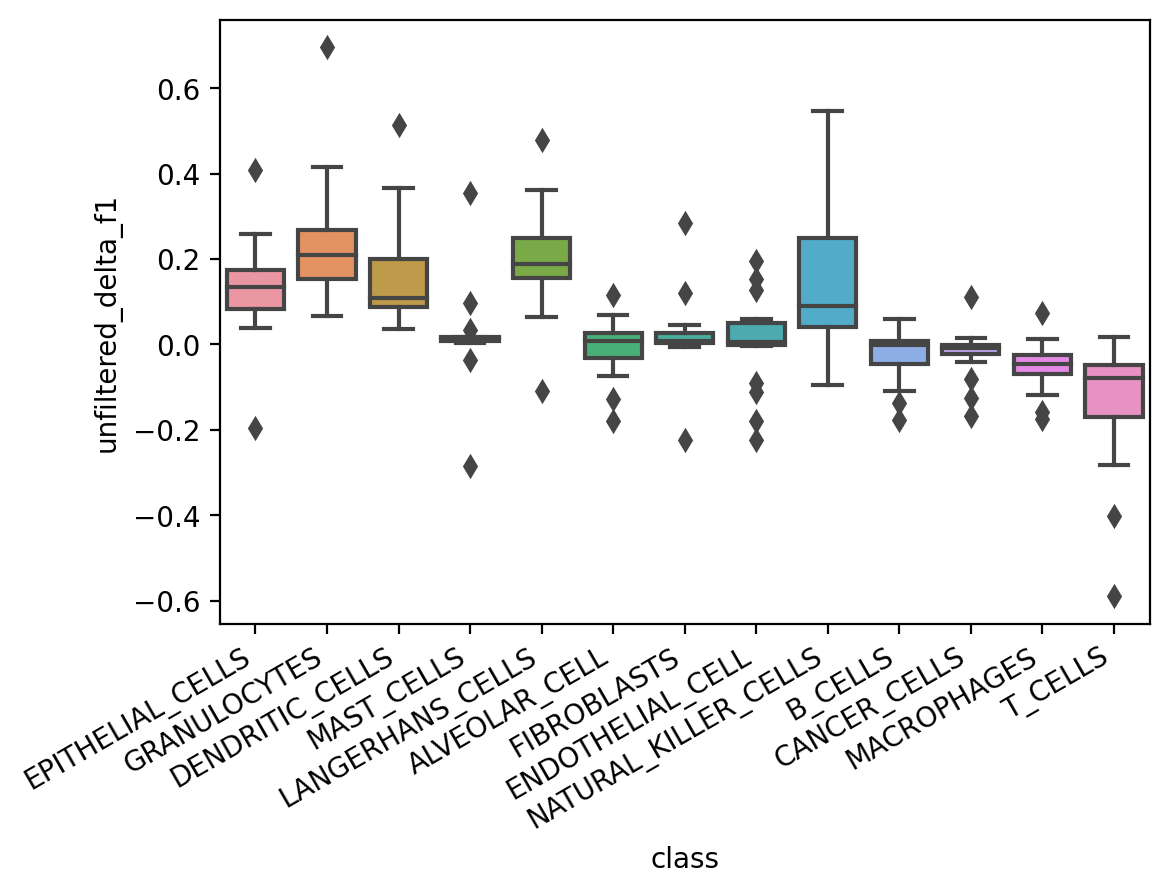

In [12]:
fig,ax = plt.subplots(1,1,dpi=200)
sctplt = sns.boxplot(data=plotdf1,x='class',y='unfiltered_delta_f1',ax=ax)
sctplt.set_xticklabels(sctplt.get_xticklabels(),rotation=30,horizontalalignment='right')
#sctplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#sctplt.set_ylim(-0.65,1.05)
#sctplt.set_xlim(-0.65,1.05)
#sctplt.set_aspect(1)

In [13]:
fulldf = pd.read_csv("/Users/erik/Documents/school/research/labelling_project/\
performance/seurat/peng_classification_report.tsv", sep='\t')
fulldf = fulldf[fulldf['method'].isin(celllist)]
#fulldf = fulldf[fulldf['support']>=500]
fulldf['cellprop']=fulldf['support']/57530
#drop unnecessary rows and sort rows from fewest to most cells
fulldf = fulldf[fulldf['class']!='macro avg']
fulldf = fulldf[fulldf['class']!='weighted avg']
fulldf = fulldf[fulldf['class']!='UNLABELED']
fulldf = fulldf[fulldf['class']!='UNAVAILABLE']
fulldf = fulldf.sort_values('support',axis=0)
fulldf['dataset'] = 'original'
celltypes = list((fulldf[fulldf['method']=='SVM']['class']))
#make a dictionary we can use to sort the other dataframe
sortdict = pd.Series(fulldf['support'].values,index=fulldf['class']).to_dict()
print(fulldf[fulldf['method']=='SVM'][['support','class']])
fulldf.drop(columns = ['precision','recall','specificity','dataset'],inplace=True)
display(fulldf.head()) 

    support               class
90    729.0      ENDOCRINE_CELL
86   1935.0         ACINAR_CELL
87   2447.0              B_CELL
95   3660.0              T_CELL
93   5361.0          MACROPHAGE
94   5907.0       STELLATE_CELL
92   6742.0          FIBROBLAST
91   9117.0    ENDOTHELIAL_CELL
88  10317.0  DUCTAL_CELL_TYPE_1
89  11315.0  DUCTAL_CELL_TYPE_2


,method,class,f1_score,support,cellprop
201,Cell_BLAST,ENDOCRINE_CELL,0.920455,729.0,0.012672
140,LDArej,ENDOCRINE_CELL,0.000000,729.0,0.012672
153,NMC,ENDOCRINE_CELL,0.736296,729.0,0.012672
165,kNN9,ENDOCRINE_CELL,0.767663,729.0,0.012672
177,ACTINN,ENDOCRINE_CELL,0.925562,729.0,0.012672


In [14]:
peng_df = pd.read_csv('./performance/Peng_PC_800.tsv',sep='\t')
peng_df.drop(columns=['precision','recall','specificity','sorting','support','cellprop','dataset'],inplace=True)

peng_df = peng_df.merge(fulldf,on=['method','class'])
peng_df['delta_f1'] = peng_df['f1_score_x'] - peng_df['f1_score_y']
peng_df.drop(columns=['f1_score_x','f1_score_y'],inplace=True)
peng_df

,method,class,support,cellprop,delta_f1
0,RF,ENDOCRINE_CELL,729.0,0.012672,0.169506
1,SVMrej,ENDOCRINE_CELL,729.0,0.012672,0.071773
2,NMC,ENDOCRINE_CELL,729.0,0.012672,0.043266
3,scmapcluster,ENDOCRINE_CELL,729.0,0.012672,0.074065
4,kNN9,ENDOCRINE_CELL,729.0,0.012672,0.121778
...,...,...,...,...,...
155,RF,DUCTAL_CELL_TYPE_2,11315.0,0.196680,-0.012236
156,SVMrej,DUCTAL_CELL_TYPE_2,11315.0,0.196680,-0.003957
157,scmapcell,DUCTAL_CELL_TYPE_2,11315.0,0.196680,-0.007764
158,CaSTLe,DUCTAL_CELL_TYPE_2,11315.0,0.196680,-0.013089


-0.49382869422714476
3.232717560349989e-11


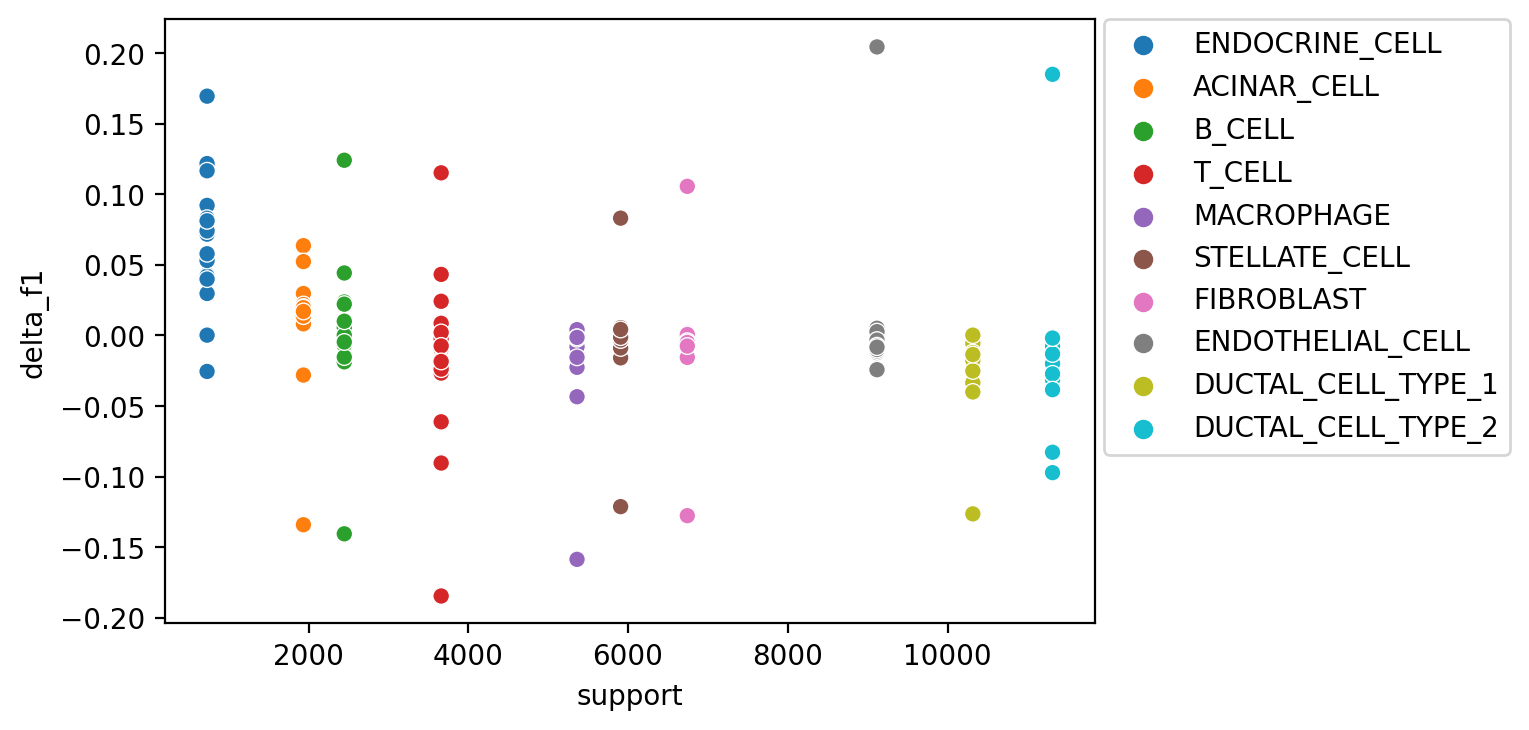

In [15]:
fig,ax = plt.subplots(1,1,dpi=200)
sctplt = sns.scatterplot(data=peng_df,x='support',y='delta_f1',hue='class',ax=ax)
sctplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#sctplt.set_ylim(-0.65,1.05)
#sctplt.set_xlim(-0.65,1.05)
#sctplt.set_aspect(1)
rho, p = spearmanr(peng_df['support'],peng_df['delta_f1'])
print(rho)
print(p)

In [16]:
plotdf2 = peng_df.append(plotdf1.drop(columns='filtered_delta_f1').rename(columns={'unfiltered_delta_f1':'delta_f1'}))
plotdf2

,method,class,support,cellprop,delta_f1
0,RF,ENDOCRINE_CELL,729.0,0.012672,0.169506
1,SVMrej,ENDOCRINE_CELL,729.0,0.012672,0.071773
2,NMC,ENDOCRINE_CELL,729.0,0.012672,0.043266
3,scmapcluster,ENDOCRINE_CELL,729.0,0.012672,0.074065
4,kNN9,ENDOCRINE_CELL,729.0,0.012672,0.121778
...,...,...,...,...,...
242,CaSTLe,T_CELLS,23149.0,0.447108,-0.079598
243,scmapcluster,T_CELLS,23149.0,0.447108,0.016439
244,NMC,T_CELLS,23149.0,0.447108,-0.281610
245,Cell_BLAST,T_CELLS,23149.0,0.447108,-0.401822


-0.4995285998628239
7.014008573008632e-26


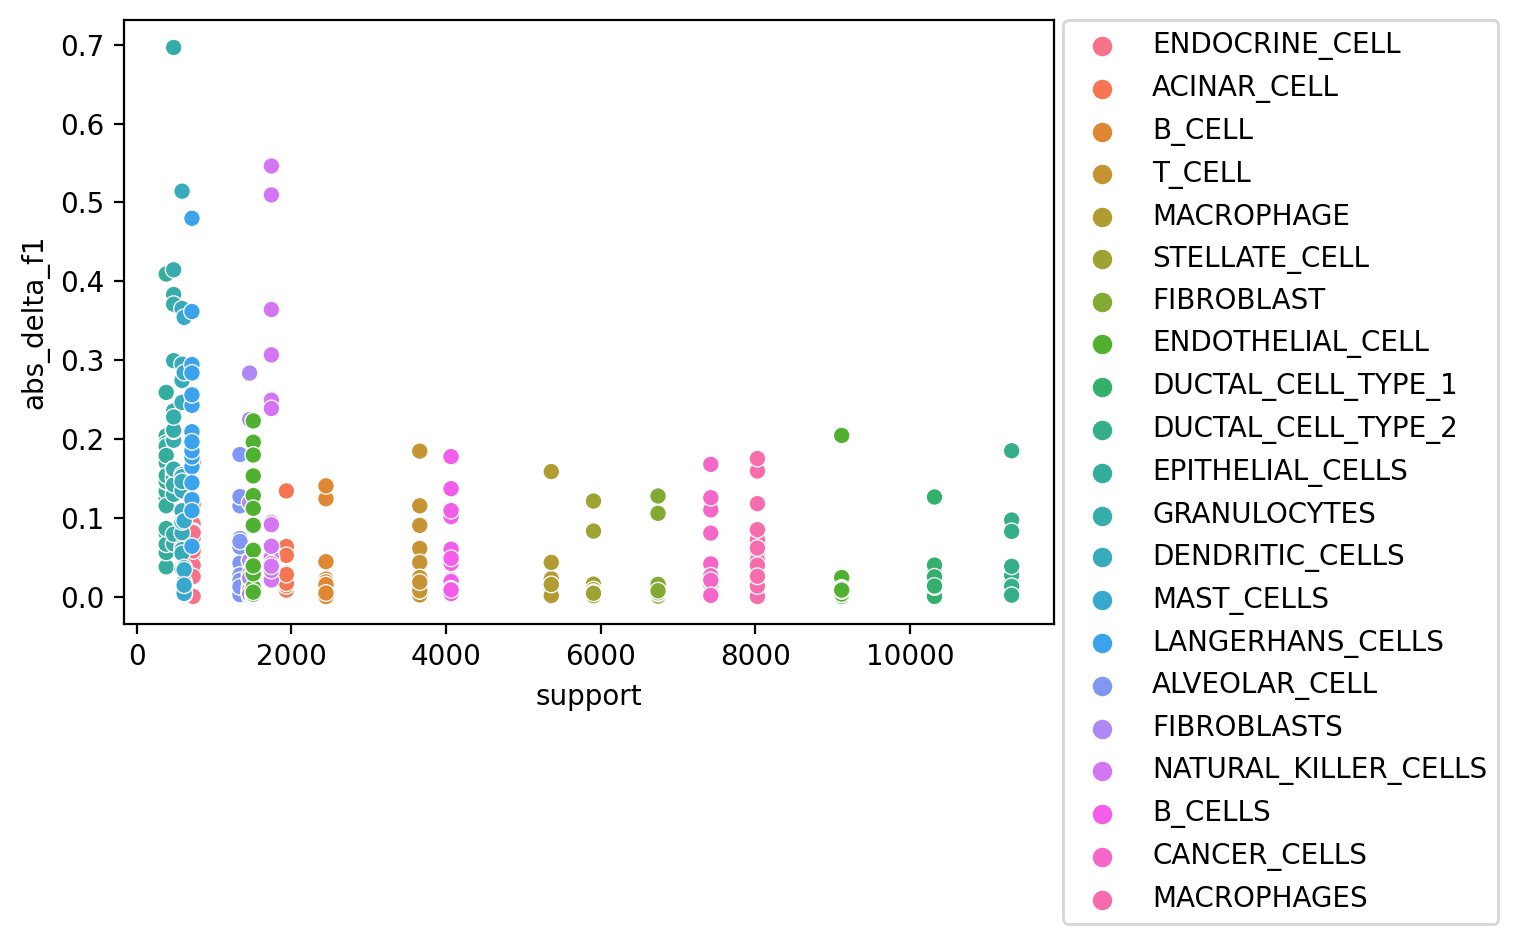

In [21]:
fig,ax = plt.subplots(1,1,dpi=200)
plotdf2=plotdf2[plotdf2['support']<=20000].copy()
plotdf2['abs_delta_f1'] = np.abs(plotdf2['delta_f1'])
sctplt = sns.scatterplot(data=plotdf2,x='support',y='abs_delta_f1',hue='class',ax=ax)
sctplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#sctplt.set_ylim(-0.65,1.05)
#sctplt.set_xlim(-0.65,1.05)
#sctplt.set_aspect(1)
rho, p = spearmanr(plotdf2['support'],plotdf2['abs_delta_f1'])
print(rho)
print(p)